In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [46]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [47]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [48]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

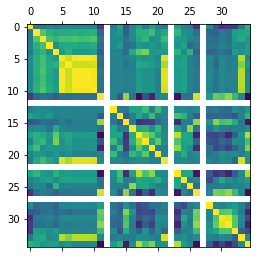

Index(['Age', 'BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small',
       'LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
       'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG', 'MN',
       'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
       'VIS99', 'VLAMCC', 'WATER', 'clusterlabels'],
      dtype='object')


In [83]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
dummy.corr(min_periods=15)
plt.matshow(dummy.corr(min_periods=15))
plt.show()
print(df.columns)

del dummy

array([[<AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='CU', ylabel='P'>,
        <AxesSubplot:xlabel='MG', ylabel='P'>,
        <AxesSubplot:xlabel='PB', ylabel='P'>,
        <AxesSubplot:xlabel='ZN', ylabel='P'>],
       [<AxesSubplot:xlabel='P', ylabel='CU'>,
        <AxesSubplot:xlabel='CU', ylabel='CU'>,
        <AxesSubplot:xlabel='MG', ylabel='CU'>,
        <AxesSubplot:xlabel='PB', ylabel='CU'>,
        <AxesSubplot:xlabel='ZN', ylabel='CU'>],
       [<AxesSubplot:xlabel='P', ylabel='MG'>,
        <AxesSubplot:xlabel='CU', ylabel='MG'>,
        <AxesSubplot:xlabel='MG', ylabel='MG'>,
        <AxesSubplot:xlabel='PB', ylabel='MG'>,
        <AxesSubplot:xlabel='ZN', ylabel='MG'>],
       [<AxesSubplot:xlabel='P', ylabel='PB'>,
        <AxesSubplot:xlabel='CU', ylabel='PB'>,
        <AxesSubplot:xlabel='MG', ylabel='PB'>,
        <AxesSubplot:xlabel='PB', ylabel='PB'>,
        <AxesSubplot:xlabel='ZN', ylabel='PB'>],
       [<AxesSubplot:xlabel='P', ylabel='ZN'>

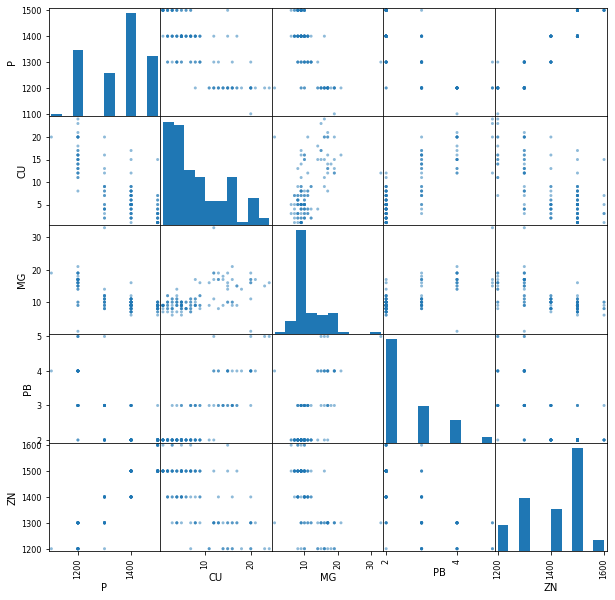

In [88]:
# expand some of the stronger linear dependencies in scatterplots

#pd.plotting.scatter_matrix(df.iloc[:,2:5],figsize=(10,10)) #plot the ISO4406 measurements
#pd.plotting.scatter_matrix(df.iloc[:,6:12],figsize=(10,10)) #plot the LNF measurements
#pd.plotting.scatter_matrix(df.iloc[:,[6,22,34]],figsize=(10,10)) #show that Na, Water correlates with LNF due to the outlier
#pd.plotting.scatter_matrix(df.iloc[:,[1,31,32,33]],figsize=(10,10)) #plot BRSTFVD,VISxx,VLAMCC
pd.plotting.scatter_matrix(df.iloc[:,[12,18,20,24,27]],figsize=(10,10)) #plot P, Cu, Mg, Pb, Zn


# 1-11 ['BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small','LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
#12-21 'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG',
#22-31 'MN', 'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
#32-34 'VIS99', 'VLAMCC', 'WATER']

In [89]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [90]:
#dispose first column of the dataframe because it is not numerical

X=df.iloc[:,1:]


In [91]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [92]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)


In [93]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


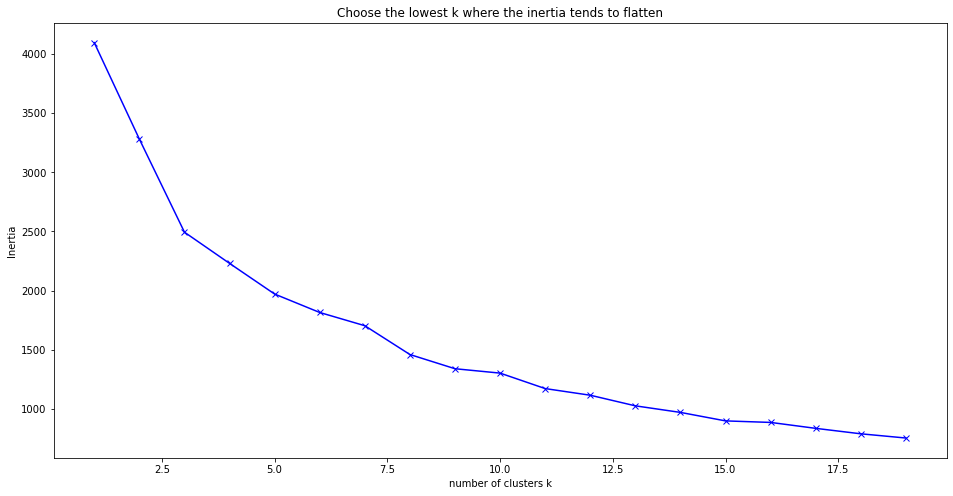

In [94]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()


In [95]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=3

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
kmeanModel.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [96]:
# display some properties of the clustering as one whishes to

#kmeanModel.inertia_
#kmeanModel.labels_
#kmeanModel.n_iter_
#kmeanModel.cluster_centers_

In [97]:
# create a dataframe of the clustercenters

dfclustercenters=pd.DataFrame(kmeanModel.cluster_centers_, columns=df.columns[1:])
dfclustercenters


,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER,clusterlabels
0,-0.185508,-0.209447,-0.138801,-0.132997,-0.202519,-0.101468,-0.142947,-0.089213,-0.094693,-0.094592,...,-0.088736,0.540350,0.0,0.206436,0.413902,0.338782,0.467447,0.226452,-0.000622,-0.617561
1,0.379198,0.359704,0.179583,0.216896,0.377354,-0.059330,0.068129,-0.083309,-0.075326,-0.074200,...,0.188293,-1.110022,0.0,-0.441128,-0.837710,-0.723159,-0.975777,-0.470350,-0.140300,1.290557
2,0.406552,3.264593,4.573999,2.545011,1.945101,11.158806,9.500171,11.088012,11.231963,11.177106,...,-0.088736,-0.959214,0.0,0.332725,-1.249483,0.514238,-0.193582,-0.190480,5.805793,0.197422


In [98]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
#df=df.sort_values("clusterlabels")
#df.describe()
dfclustermeans=df.groupby("clusterlabels").mean()

In [99]:
# save the dataframes

#dfclustercenters.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clustercenters.csv", decimal=",")
df.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clusteredsamples.csv",decimal=",")
dfclustermeans.to_csv("clustermeans.csv",decimal=",")